In [1]:
import pandas as pd
import re

columns = ['index', 'entity', 'sentiment', 'text']

train_df = pd.read_csv('twitter_training.csv', names=columns, header=None)
validation_df = pd.read_csv('twitter_validation.csv', names=columns, header=None)

print("Training Data Columns:", train_df.columns)
print(train_df.head())

print("\nValidation Data Columns:", validation_df.columns)
print(validation_df.head())

Training Data Columns: Index(['index', 'entity', 'sentiment', 'text'], dtype='object')
   index       entity sentiment  \
0   2401  Borderlands  Positive   
1   2401  Borderlands  Positive   
2   2401  Borderlands  Positive   
3   2401  Borderlands  Positive   
4   2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Validation Data Columns: Index(['index', 'entity', 'sentiment', 'text'], dtype='object')
   index     entity   sentiment  \
0   3364   Facebook  Irrelevant   
1    352     Amazon     Neutral   
2   8312  Microsoft    Negative   
3   4371      CS-GO    Negative   
4   4433     Google     Neutral   

                                                text  
0  I mentioned o

In [4]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    if isinstance(text, str):  
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)  
        filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return ' '.join(filtered_tokens)
    else:
        return np.nan
    
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
validation_df['cleaned_text'] = validation_df['text'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\LENOVO/nltk_data'
    - 'C:\\Users\\LENOVO\\anaconda3\\nltk_data'
    - 'C:\\Users\\LENOVO\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\LENOVO\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\LENOVO\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [5]:
import nltk
  >>> nltk.download('punkt_tab')
  


IndentationError: unexpected indent (<ipython-input-5-34a8d83c09e9>, line 2)

In [6]:
import nltk
nltk.download('punkt_tab')
  

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [9]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    if isinstance(text, str):  
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)  
        filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return ' '.join(filtered_tokens)
    else:
        return np.nan
    
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
validation_df['cleaned_text'] = validation_df['text'].apply(preprocess_text)

In [10]:
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    if isinstance(text, str):  
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)  
        filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return ' '.join(filtered_tokens)
    else:
        return np.nan
    
train_df['cleaned_text'] = train_df['text'].apply(preprocess_text)
validation_df['cleaned_text'] = validation_df['text'].apply(preprocess_text)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

train_df['cleaned_text'] = train_df['cleaned_text'].fillna('')
validation_df['cleaned_text'] = validation_df['cleaned_text'].fillna('')

vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['cleaned_text'])
X_validation = vectorizer.transform(validation_df['cleaned_text'])

y_train = train_df['sentiment']
y_validation = validation_df['sentiment']

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_validation = model.predict(X_validation)

print("Validation Data Classification Report:")
print(classification_report(y_validation, y_pred_validation))

validation_accuracy = accuracy_score(y_validation, y_pred_validation)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Data Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.80      0.66      0.72       172
    Negative       0.76      0.87      0.81       266
     Neutral       0.84      0.76      0.80       285
    Positive       0.81      0.86      0.83       277

    accuracy                           0.80      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.80      0.80      1000

Validation Accuracy: 0.8010


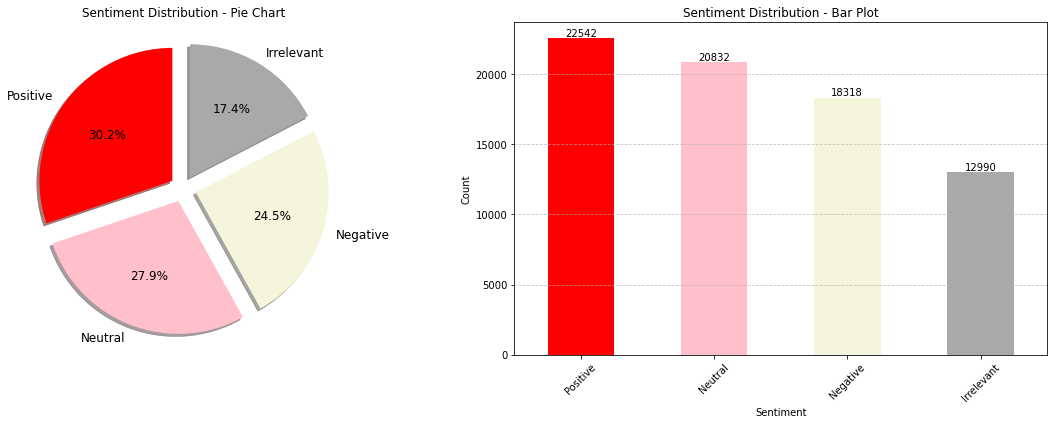

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['red', 'pink', 'beige', 'darkgrey']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].pie(y_train.value_counts(), labels=y_train.unique(), autopct='%1.1f%%',
            startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
            explode=[0.1, 0.1, 0.1, 0.1], colors=colors, shadow=True)
axs[0].set_title('Sentiment Distribution - Pie Chart')

sentiment_counts = y_train.value_counts()
sentiment_counts.index = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
axs[1] = sentiment_counts.plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Sentiment Distribution - Bar Plot')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()